In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import plotly.express as px
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

%matplotlib inline

Read three tables into dataframe.

In [2]:
df_enrollment = pd.read_csv('../../data/csv/enrollment.csv')

In [3]:
df_course = pd.read_csv('../../data/csv/courses.csv')

In [4]:
df_student = pd.read_csv('../../data/csv/student.csv')

### 1. Organize data

We will focus on analyzing the master courses because the bachelor courses are compulsory so it is not interesting.
So first we get the clean data of master course enrollment.

Clean student course registration table.

In [5]:
df_enrollment.dropna(axis=0,how='any',inplace=True)

Only master courses are selected to df_clean_enrollment

In [6]:
df_clean_enrollment = df_enrollment[df_enrollment['semester'].str.contains('Master semestre')]

In [7]:
print("Now we have ", len(df_clean_enrollment), " master course registration.")

Now we have  201120  master course registration.


Clean course and student information table.

In [8]:
df_course.dropna(axis=0,how='any',inplace=True)

In [9]:
df_student.dropna(axis=0,how='any',inplace=True)

### 2. Generate tables, show statistics and visualize some examples

#### 1. Change of number of student enrollment
We create df_year_enrollment table to show how many students take a certain course in a certain year in order to show the changes of popuarity of each course over the years.

In [10]:
df_enrollment_course = df_clean_enrollment.merge(df_course, left_on = 'course_id', right_on ='course_id', how='inner').drop(['Unnamed: 0_x','Unnamed: 0_y'], axis =1)

In [11]:
df_year_enrollment = df_enrollment_course.groupby(['course_name','year'])['student_id'].count().reset_index().rename(columns={'student_id': '#student'})

In [12]:
df_year_enrollment

,course_name,year,#student
0,Numerical approximation of PDE's II,2012-2013,7
1,Numerical approximation of PDE's II,2013-2014,5
2,Numerical approximation of PDE's II,2014-2015,4
3,Numerical approximation of PDE's II,2015-2016,11
4,Numerical approximation of PDE's II,2016-2017,13
...,...,...,...
9669,Écoulements transitoires,2004-2005,1
9670,Écoulements transitoires,2005-2006,5
9671,Écoulements transitoires,2006-2007,7
9672,Écoulements transitoires,2007-2008,10


In [13]:
df_year_enrollment.describe()

,#student
count,9674.000000
mean,20.789746
std,21.587340
min,1.000000
25%,7.000000
50%,14.000000
75%,27.000000
max,276.000000


In [14]:
print("there are ", df_year_enrollment['course_name'].nunique(), " different master courses.")

there are  2158  different master courses.


Let's take a look of top 30 popular courses. We show the courses and year together as we also want to see changes of courses.

In [15]:
df_year_enrollment.sort_values('#student',ascending=False).nlargest(10, columns='#student')

,course_name,year,#student
4893,Machine learning,2019-2020,276
4892,Machine learning,2018-2019,275
4891,Machine learning,2017-2018,220
705,Applied data analysis,2019-2020,210
703,Applied data analysis,2017-2018,194
704,Applied data analysis,2018-2019,184
4086,Image processing I,2019-2020,177
6279,Pattern classification and machine learning,2016-2017,172
2235,De la structure à l'ornement,2016-2017,172
2237,De la structure à l'ornement,2018-2019,170


We see machine learning is the most popular course and the number of student enrollments in most of courses from computer sciences are increasing sharply.

Let's simply visualize changes in the courses which have top 10 total student registration over the years.

In [16]:
course_list = df_year_enrollment.groupby('course_name')['#student'].sum().reset_index().sort_values(by ='#student',ascending = False)['course_name'][:5].tolist()

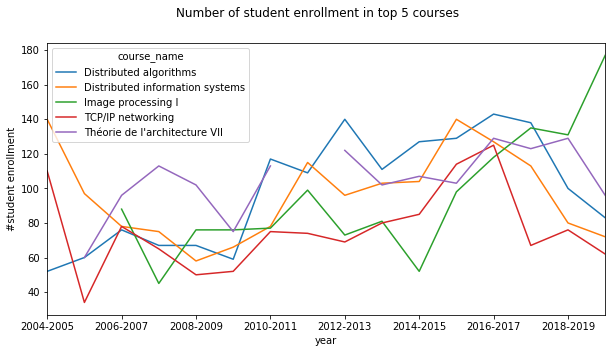

In [17]:
# plot data

fig, ax = plt.subplots(figsize=(10,5))
fig.suptitle('Number of student enrollment in top 5 courses')
plt.xlabel('year range')
plt.ylabel('#student enrollment')
# use unstack()
df_enrollment_course[df_enrollment_course['course_name'].isin(course_list)].groupby(['year','course_name'])['student_id'].count().unstack().plot(ax=ax)
plt.show()

We can see number of srudent registration in image processing I increases sharply in recent years which is not the same in Cryptography and security.

In [18]:
df_student_enrollment = df_enrollment_course.merge(df_student,left_on = 'student_id', right_on ='student_id', how='inner').drop(['Unnamed: 0'], axis =1)

#### 2. Comparison in the student major(section) composition of each courses
We generate df_major_enrollemnt table showing the major distribution among students in each course.
We want to see the section intake of different courses, i.e, the conposition of student major.

In [19]:
df_major_enrollemnt = df_student_enrollment.groupby(['course_name','section'])['student_id'].count().reset_index().rename(columns={'student_id': '#student'})

In [20]:
df_major_enrollemnt

,course_name,section,#student
0,Numerical approximation of PDE's II,Ingénierie mathématique,16
1,Numerical approximation of PDE's II,Mathématiques - master,5
2,Numerical approximation of PDE's II,Science et ingénierie computationnelles,22
3,A Political History of Urban Form,Architecture,119
4,A guided tour for engineers in applied stochas...,Microtechnique,38
...,...,...,...
3739,Wind energy,Génie nucléaire,2
3740,Wireless communications and mobility,Systèmes de communication - master,9
3741,Wireless receivers: algorithms and architectures,Génie électrique et électronique,219
3742,"Wood structures, properties and uses",Science et génie des matériaux,223


In [21]:
df_major_enrollemnt.describe()

,#student
count,3744.000000
mean,53.717949
std,106.111561
min,1.000000
25%,5.000000
50%,17.000000
75%,52.000000
max,1470.000000


Take Machine learning course as an example, we can see the most student in image processing I is from Microengineering.

In [22]:
df_major_enrollemnt[df_major_enrollemnt['course_name']=='Image processing I']

,course_name,section,#student
1615,Image processing I,Bioingénierie,52
1616,Image processing I,Génie électrique et électronique,83
1617,Image processing I,Humanités digitales,5
1618,Image processing I,Informatique,272
1619,Image processing I,Ingénierie des sciences du vivant,138
1620,Image processing I,Microtechnique,519
1621,Image processing I,Robotique,13
1622,Image processing I,Science et ingénierie computationnelles,94
1623,Image processing I,Sciences et ingénierie de l'environnement,12
1624,Image processing I,Sciences et technologies du vivant - master,60


Take Machine learning course as an example, we see the most students come from computer science and data science which is not the same in image processing I.

In [23]:
df_major_enrollemnt[df_major_enrollemnt['course_name']=='Machine learning']

,course_name,section,#student
1957,Machine learning,Data Science,78
1958,Machine learning,Génie électrique et électronique,52
1959,Machine learning,Humanités digitales,9
1960,Machine learning,Informatique,427
1961,Machine learning,Informatique - Cybersecurity,1
1962,Machine learning,Ingénierie des sciences du vivant,91
1963,Machine learning,Ingénierie financière,23
1964,Machine learning,"Management, technologie et entrepreneuriat",9
1965,Machine learning,Science et ingénierie computationnelles,36
1966,Machine learning,Sciences et technologies du vivant - master,10


In [25]:
fig = px.pie(df_major_enrollemnt[df_major_enrollemnt['course_name']=='Machine learning'], values='#student', names='section', title='Machine Learning major composition')

The figure showing the machine learning course major intake is in the link: https://jiang15.github.io/Deep_learning_project/MachineLearningMajor.html

#### 3. Similarity of courses
We generate the table of student_course to show the course registration for each student.
We want to show the similarity of courses through the student choice based on the hypothesis that the courses chose by the same student have some commons and so they are similar.


Create the table to see the course list taken by each student

In [25]:
student_course = df_student_enrollment[['student_id', 'course_name']].drop_duplicates()
student_course = student_course.groupby('student_id')['course_name'].apply(list).reset_index()

In [26]:
student_course.head()

,student_id,course_name
0,0,"[Hydrodynamique acoustique, Aeroelasticity and..."
1,1,"[Biomechanics of the musculoskeletal system, F..."
2,2,[Qualité de l'environnement intérieur]
3,3,"[Swarm intelligence, Cryptography and security..."
4,5,"[Quantum field theory I, Quantum electrodynami..."


In [27]:
course_all = df_student_enrollment['course_name'].unique().tolist()

In [28]:
df_course_relation = pd.DataFrame(np.zeros([len(course_all),len(course_all)]),
                   columns=course_all, index=course_all)

In [29]:
# build function for calculating similarity of course based on student enrollment
def add_relation(courses):
    '''
    args: 
       courses: the list of courses taken by the same student.
       
    algorithm: add one point to the location of (course_x, course_y) to the relationship between course_x and course_y
               if the same student has taken them together. 
    '''
    for i in range(len(courses)):
        if i < len(courses)-1:
            for j in np.arange(i+1,len(courses)):
                
                if courses[i]!= courses[j]:
                    df_course_relation.loc[courses[i], courses[j]] += 1
                    df_course_relation.loc[courses[j], courses[i]] += 1

Apply the function and show the co-occurrence matrix of course enrollment

In [30]:
student_course['course_name'].apply(add_relation)

0        None
1        None
2        None
3        None
4        None
         ... 
20392    None
20393    None
20394    None
20395    None
20396    None
Name: course_name, Length: 20397, dtype: object

For example, let's take a look at the six courses (Machine learning, Deep learning, Data visualization, Applied data analysis, Distributed algorithms, Concurrent algorithms)

In [31]:
course_cor_list = ['Information security and privacy', 'Software security','Data visualization','Applied data analysis','Distributed algorithms','Concurrent algorithms']

In [32]:
df_course_relation.loc[course_cor_list,course_cor_list]

,Information security and privacy,Software security,Data visualization,Applied data analysis,Distributed algorithms,Concurrent algorithms
Information security and privacy,0.0,61.0,138.0,225.0,211.0,113.0
Software security,61.0,0.0,22.0,30.0,44.0,29.0
Data visualization,138.0,22.0,0.0,202.0,121.0,57.0
Applied data analysis,225.0,30.0,202.0,0.0,256.0,120.0
Distributed algorithms,211.0,44.0,121.0,256.0,0.0,431.0
Concurrent algorithms,113.0,29.0,57.0,120.0,431.0,0.0


We can see the number of students taking distributed algorithms and concurrent alogorithms together is huge while less people taking data visualization. Let's normalize them by columns to see the percentage of students. The cocurrence matrix is not symetric because their number of student erollments is not the same. For example, 0.080110 in second column stands for the percentage of software security student takes information security and privacy while 0.013420 in first column is the opposite.

In [33]:
nor_df_course_relation = df_course_relation/(df_course_relation.sum())

In [34]:
nor_df_course_relation.loc[course_cor_list,course_cor_list]

,Information security and privacy,Software security,Data visualization,Applied data analysis,Distributed algorithms,Concurrent algorithms
Information security and privacy,0.000000,0.072792,0.048832,0.032689,0.014651,0.021137
Software security,0.013662,0.000000,0.007785,0.004359,0.003055,0.005425
Data visualization,0.030907,0.026253,0.000000,0.029348,0.008402,0.010662
Applied data analysis,0.050392,0.035800,0.071479,0.000000,0.017775,0.022447
Distributed algorithms,0.047256,0.052506,0.042817,0.037193,0.000000,0.080621
Concurrent algorithms,0.025308,0.034606,0.020170,0.017434,0.029926,0.000000


We can see data visualization is highly cotaken by students with applied data analysis which is the same as the relationship between concurrent algorithms and distributed algorithms, information security and software security.

#### 4. Cluster courses
Treat students as binary features of the courses, e.g, if student y took course x then df_student_enrollment[x, y] = 1 otherwise is 0. Then, we can compute the correlations between the courses.

In [41]:
df_student_enrollment.section.unique()

# Filter courses to have a subset (e.g. just courses of section Informatique and Architecture)
df_student_enrollment_small = df_student_enrollment[(df_student_enrollment.section == 'Informatique') | (df_student_enrollment.section == 'Architecture')]
df_student_enrollment_small

,student_id,course_id,semester,course_name,year,student_name,section
967,4808,28,Master semestre 1,Théorie et critique du projet MA1 (Gueissaz),2012-2013,Bolle-Reddat Guillaume,Architecture
968,4808,239,Master semestre 1,Les voies de l'eau,2013-2014,Bolle-Reddat Guillaume,Architecture
969,4808,347,Master semestre 1,Architecture et construction de la ville I,2012-2013,Bolle-Reddat Guillaume,Architecture
970,4808,570,Master semestre 2,Architecture et construction de la ville II,2012-2013,Bolle-Reddat Guillaume,Architecture
971,4808,1918,Master semestre 2,UE N : Art et architecture II,2012-2013,Bolle-Reddat Guillaume,Architecture
...,...,...,...,...,...,...,...
201071,24176,15971,Master semestre 1,Information theory and coding,2008-2009,Liang Hui,Informatique
201072,34803,15971,Master semestre 1,Information theory and coding,2008-2009,Roman Rangel Edgar,Informatique
201084,19456,16001,Master semestre 2,Topics in theoretical computer science,2015-2016,Hunkenschröder Christoph,Informatique
201086,16568,16004,Master semestre 2,Topics in theoretical computer science,2014-2015,Golebiewski Mateusz,Informatique


In [42]:
df_course_features = df_student_enrollment_small.loc[:, ['course_name', 'student_id']]
df_course_features['took_course'] = 1
df_course_features = df_course_features.drop_duplicates().pivot(index='course_name', columns='student_id').fillna(0)
df_course_features.shape

(528, 5401)

In [43]:
# Compute correlation between courses
course_correlation = df_course_features.transpose().corr()
course_correlation

course_name,A Political History of Urban Form,A history of abstraction in architecture,Advanced algorithms,Advanced compiler construction,Advanced computer architecture,Advanced computer graphics,Advanced computer networks and distributed systems,Advanced databases,Advanced digital design,Advanced multiprocessor architecture,...,Urbanisme en Asie,Urbanisme et territoires,VLSI design I,VLSI design II,Ville africaine: introduction à la planification,Ville et mobilité,Virtual reality,"Visionnaires éclectiques. Architectures, 2000-2018",Visions et Utopies,Why care? Une introduction à l'art contemporain
course_name,,,,,,,,,,,,,,,,,,,,,
A Political History of Urban Form,1.000000,0.169093,-0.051760,-0.036400,-0.037856,-0.043416,-0.023103,-0.037980,-0.014509,-0.018287,...,0.028103,0.044027,-0.008918,-0.002043,0.071414,0.016429,-0.041932,0.299827,0.165258,0.324368
A history of abstraction in architecture,0.169093,1.000000,-0.055423,-0.038977,-0.040535,-0.046489,-0.024738,-0.040668,-0.015536,-0.019582,...,0.036600,0.001790,-0.009549,-0.002187,0.074015,0.009484,-0.044899,0.462079,0.185354,0.169649
Advanced algorithms,-0.051760,-0.055423,1.000000,0.233750,0.146117,0.145583,0.114733,0.117370,-0.027061,0.068077,...,-0.108068,-0.058083,0.009951,-0.004693,-0.074525,-0.101421,0.100721,-0.049722,-0.097262,-0.037463
Advanced compiler construction,-0.036400,-0.038977,0.233750,1.000000,0.252473,0.150934,0.123959,0.091602,0.060966,0.111855,...,-0.076000,-0.040847,-0.014409,-0.003300,-0.052410,-0.071326,0.100702,-0.034967,-0.068400,-0.026346
Advanced computer architecture,-0.037856,-0.040535,0.146117,0.252473,1.000000,0.152296,0.106584,0.149604,0.179449,0.242437,...,-0.079038,-0.042480,0.064143,0.053957,-0.054505,-0.074177,0.128410,-0.036365,-0.071135,-0.027399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ville et mobilité,0.016429,0.009484,-0.101421,-0.071326,-0.074177,-0.085073,-0.045270,-0.074421,-0.028430,-0.035833,...,0.181076,0.050686,-0.017475,-0.004002,0.075572,1.000000,-0.082164,0.039912,0.003438,0.025381
Virtual reality,-0.041932,-0.044899,0.100721,0.100702,0.128410,0.502727,0.037780,0.136618,0.099823,-0.004280,...,-0.087549,-0.047054,-0.004531,-0.003802,-0.060374,-0.082164,1.000000,-0.040281,-0.078794,-0.030349
"Visionnaires éclectiques. Architectures, 2000-2018",0.299827,0.462079,-0.049722,-0.034967,-0.036365,-0.041707,-0.022194,-0.036484,-0.013938,-0.017567,...,0.028309,-0.008280,-0.008567,-0.001962,0.032325,0.039912,-0.040281,1.000000,0.144964,0.240707


In [44]:
x = df_course_features.sort_index()
y = df_student_enrollment_small[['course_name', 'section']].groupby('course_name', as_index=True, sort=True, group_keys=True).agg(lambda x:x.value_counts().index[0])
x.shape, y.shape

((528, 5401), (528, 1))

(528, 2)

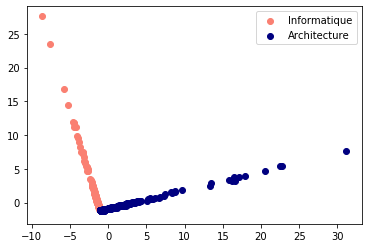

In [47]:
# PCA
pca = PCA(n_components=2)
df_course_features_2d = pca.fit_transform(df_course_features)

inf = df_course_features_2d[y.section == 'Informatique']
bio = df_course_features_2d[y.section == 'Architecture']

plt.scatter(inf[:, 0], inf[:, 1], c='salmon', label='Informatique')
plt.scatter(bio[:, 0], bio[:, 1], c='navy', label='Architecture')
plt.legend()

df_course_features_2d.shape

(528, 2)

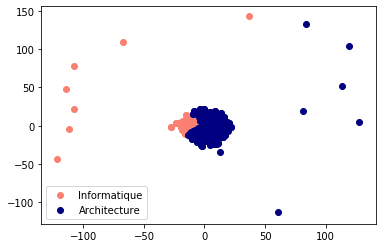

In [48]:
# TSNE plot
df_course_features_2d = TSNE(n_components=2).fit_transform(df_course_features)
inf = df_course_features_2d[y.section == 'Informatique']
bio = df_course_features_2d[y.section == 'Architecture']

plt.scatter(inf[:, 0], inf[:, 1], c='salmon', label='Informatique')
plt.scatter(bio[:, 0], bio[:, 1], c='navy', label='Architecture')
plt.legend()

df_course_features_2d.shape